<a href="https://colab.research.google.com/github/avisekregmi/Python_class3pm/blob/main/Final_Project_Water_Quality_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# Water Quality Project**

Drinking water potability by: Avisek Regmi 

**Context**

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving water_potability.csv to water_potability.csv


In [ ]:
df = pd.read_csv("/content/water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
df.describe() # to shows the count, mean, std, min 


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
df.info() # to check data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.isnull().sum() # to check null value

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

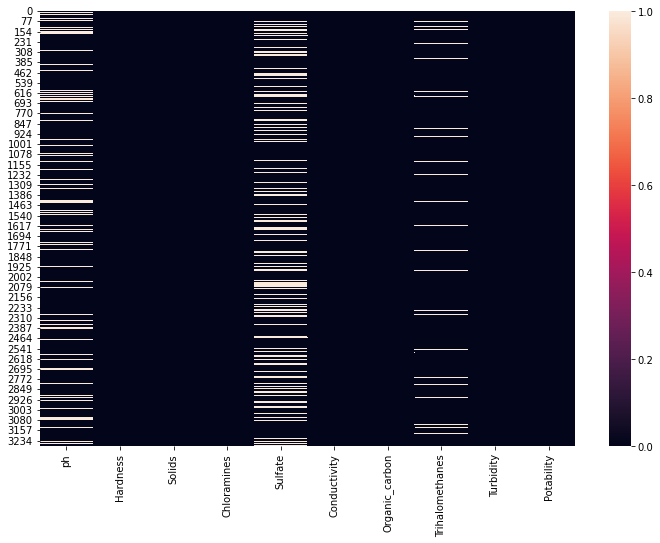

In [ ]:
plt.figure(figsize = (12,8)) # to make the figure size larger
sns.heatmap(df.isnull()) # to visualize the null value, the white lines shows null value.

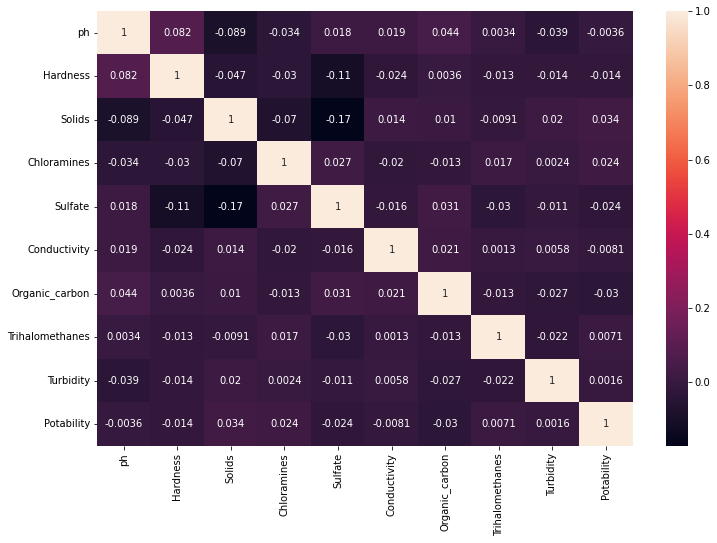

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot = True) # to check the highest correlation value

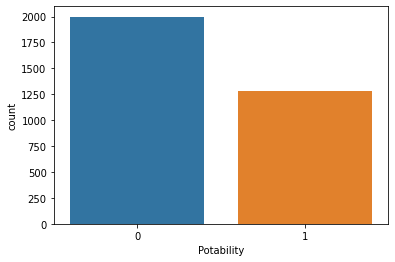

In [ ]:
sns.countplot(x = "Potability", data= df) # to check for potability

In [ ]:
df["Potability"].value_counts() #  0 data that is bad for drinking water a

0    1998
1    1278
Name: Potability, dtype: int64

In [ ]:
# Visualization of dataset and also checking  for outliers

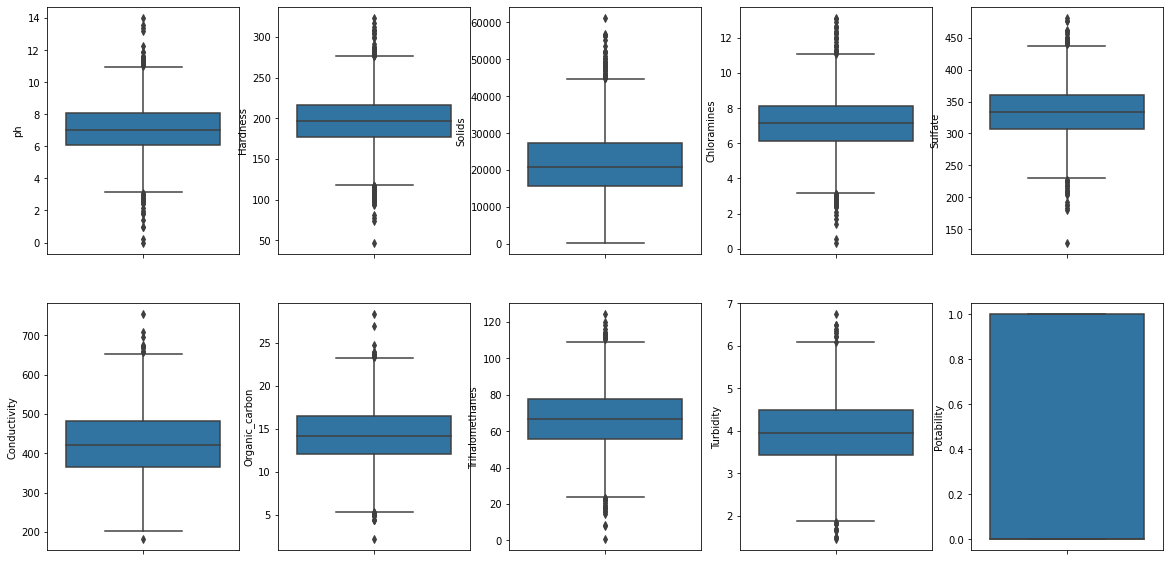

In [ ]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize = (20,10))

ax = ax.flatten()

index = 0

for col,values in df.items():
  sns.boxplot(y=col,data=df,ax=ax[index])
  index +=1

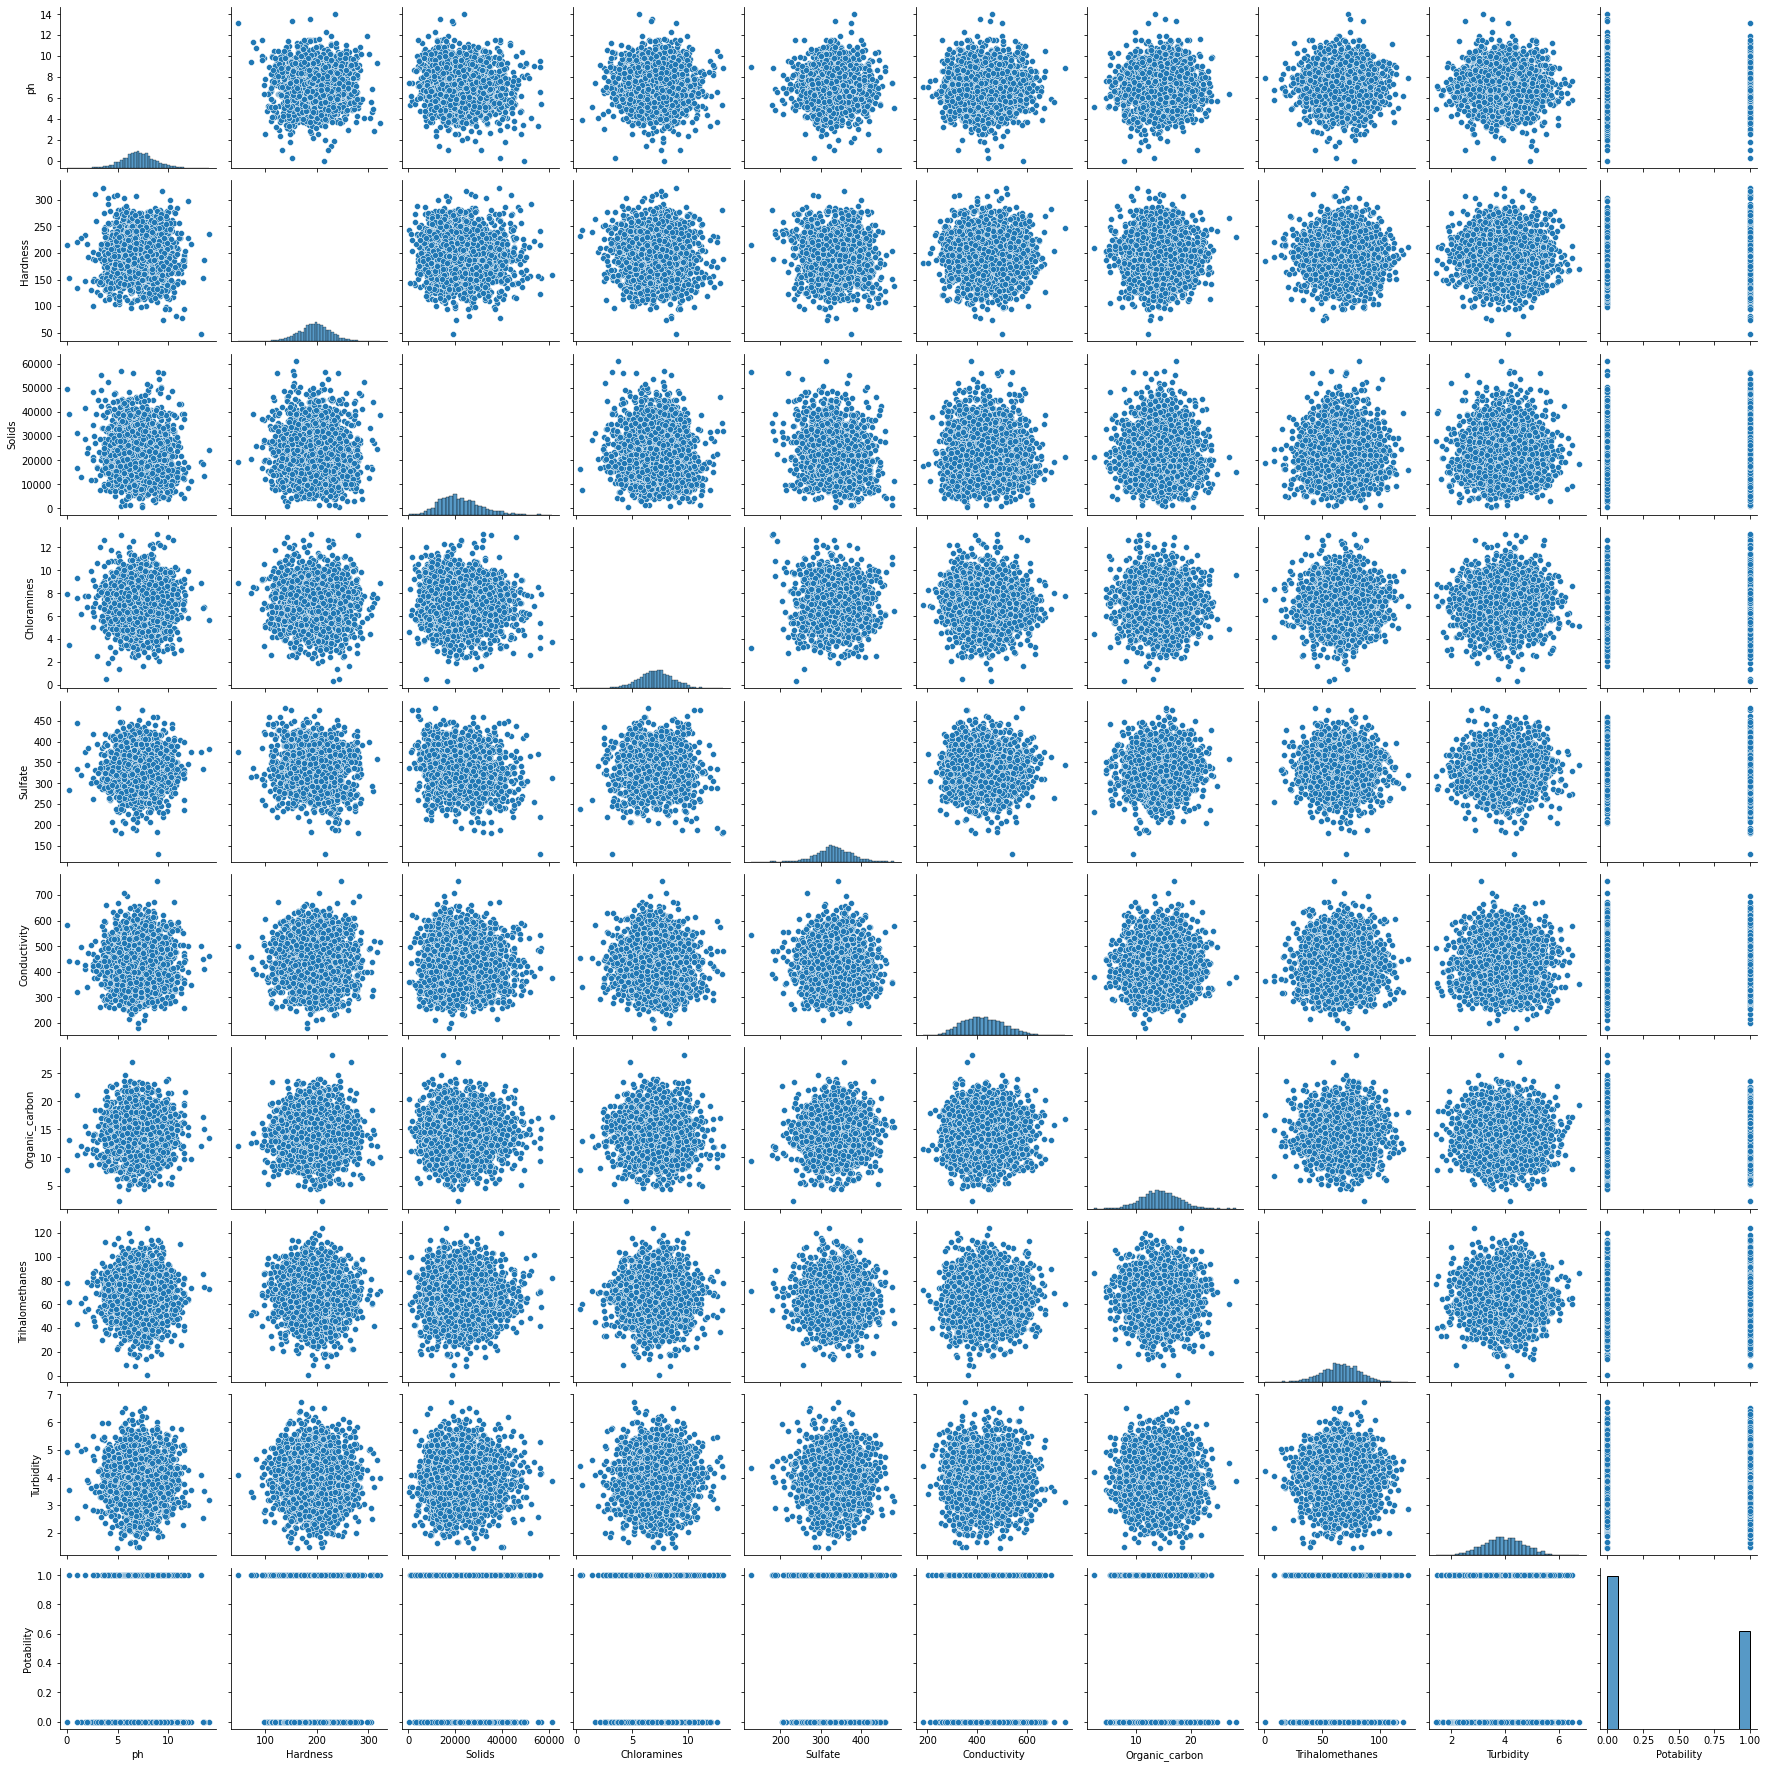

In [ ]:
sns.pairplot(df) # every row will be compared with every column

In [ ]:
fig = px.pie(df,names = "Potability", hole = 0.4,) # check to potability on the pie chart
fig.show()

In [ ]:
fig = px.scatter(df, x= "ph", y = "Sulfate", color = "Potability",)
fig.show() # Blue dot shows Potability as 0 and Yellow dot shows Potability as 1

In [ ]:
fig = px.scatter(df, x= "Organic_carbon", y = "Hardness", color = "Potability")
fig.show()

Text(0, 0.5, 'Percentage of missing value')

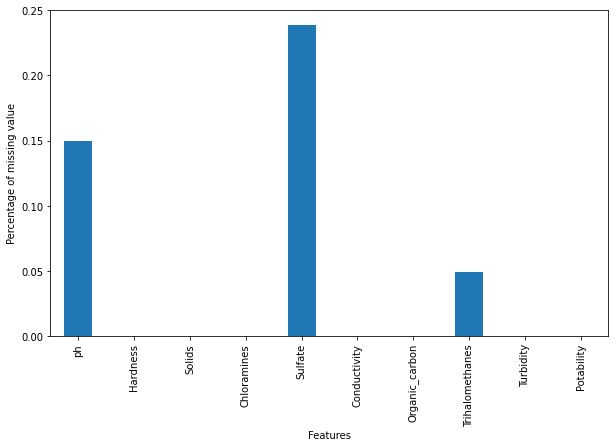

In [ ]:
df.isnull().mean().plot.bar(figsize = (10,6)) # how many total percentage you have null value in ph which is 15%, sulfate 25%, and Trihalmethanes 5% column
plt.xlabel("Features")
plt.ylabel("Percentage of missing value")

In [ ]:
# to remove all the null values and to fill the date with all the mean with all the ph values. 
df["ph"] = df["ph"].fillna(df["ph"].mean()) # where ever there is null value we want to fill with the mean.
df["Sulfate"] = df ["Sulfate"].fillna(df["Sulfate"].mean())
df["Trihalomethanes"] = df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean())

In [ ]:
df.isnull().sum() # shows that we do not have any null value now, we filled all the null value with the mean of the particular column

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

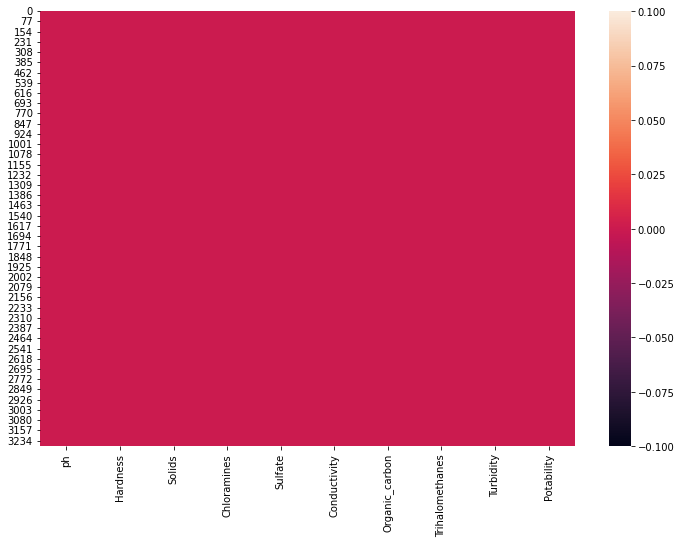

In [ ]:
# plot heatmap to show there is no null value.
plt.figure(figsize = (12,8))
sns.heatmap(df.isnull()) # the red shows there is no more null values.

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
# split data between features and target
x = df.drop("Potability", axis = 1)
y = df["Potability"]

In [ ]:
x.shape, y.shape # total number of rows we have, total number of features is 9 , target we have 1 column

((3276, 9), (3276,))

In [ ]:
# we are making the object of the StandardScaler, this will scale everything with the mean with the standard deviation 
scaler = StandardScaler()
x = scaler.fit_transform(x) # calling a method to calculate the mean the std of the data, and apply it to all the columns.

In [ ]:
# now we need to split the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [ ]:
x_train.shape, x_test.shape

((2620, 9), (656, 9))

# Classification Model

# 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# create object of the Logistic Regression
model_lr = LogisticRegression()

In [ ]:
# Training of the model Logistic Regression
model_lr.fit(x_train, y_train) # x_train is features and y_train is the target

LogisticRegression()

In [ ]:
# Next we make Prediction using Logistic Regression
pred_lr = model_lr.predict(x_test)

In [ ]:
# Next we check the accuracy score of Logistic Regression
accuracy_score_lr = accuracy_score(y_test, pred_lr)
accuracy_score_lr * 100

58.079268292682926

In [ ]:
# Nex we check the confusion matrix for Logistic Regression
cm = confusion_matrix(y_test, pred_lr)
cm

array([[381,   0],
       [275,   0]])

# 2. Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# create object of the Decision Tree Classifier
model_dt = DecisionTreeClassifier(max_depth = 4)

In [ ]:
# Training of the model Decision Tree Classifier
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
# Next we make Prediction using Decision Tree Classifier
pred_dt = model_dt.predict(x_test)

In [ ]:
# Next we check the accuracy score of Decision Tree Classifier
accuracy_score_dt = accuracy_score(y_test, pred_dt)
accuracy_score_dt * 100

60.518292682926834

# In comparing the two models the accuracy score of Decision Tree Classifier model is giving a accuracy score of 60%  while Logistic Regression model is giving a accuracy score of 58% which determines that based on this data Decision Tree Classifier model results in better accuracy score than Logistic Regression.

In [ ]:
# Nex we check the confusion matrix for Decision Tree Classifier
cm2 = confusion_matrix(y_test, pred_dt)
cm2

array([[370,  11],
       [248,  27]])

# 3. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# create object of the Random Forest Classifier
model_rf = RandomForestClassifier()

In [ ]:
# Training of the model Random Forest Classifier
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
# Next we make Prediction using Random Forest Classifier
pred_rf = model_rf.predict(x_test)

In [ ]:
# Next we check the accuracy score of Random Forest Classifier
accuracy_score_rf = accuracy_score(y_test, pred_rf)
accuracy_score_rf * 100

64.78658536585365

# In comparing the three models the accuracy score of Decision Tree Classifier model, the accuracy score of Logistic Regression model and the accuracy score of Random Forest Classifier, Random Forest Classifier is giving the best accuracy result of 64% based on this data.

# *However it does not mean that this model is better than the other two, rather this is determined by which algorithm is better suited for this data set.*



In [ ]:
# Nex we check the confusion matrix for Random Forest Classifier
cm3 = confusion_matrix(y_test, pred_rf)
cm3

array([[350,  31],
       [200,  75]])

# 4. XGBoosT

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# create object of the XGBoosT Classifier
model_xgb = XGBClassifier(n_estimators = 100, learning_rate = 0.04)

In [ ]:
# Training of the model XGBoosT Classifier
model_xgb.fit(x_train, y_train)

XGBClassifier(learning_rate=0.05)

In [ ]:
# Next we make Prediction using XGBoosT Classifier
pred_xgb = model_xgb.predict(x_test)

In [ ]:
# Next we check the accuracy score of XGBoosT Classifier
accuracy_score_xgb = accuracy_score(y_test, pred_xgb)
accuracy_score_xgb * 100

63.71951219512195

In [ ]:
# Next we check the confusion matrix for XGBoosT Classifier

In [ ]:
models = pd.DataFrame({
    "Model": ["Logistic Regression",
              "Decision Tree",
              "Random Forest",
              "XGBoosT"],
      "Accuracy Score" : [accuracy_score_lr, accuracy_score_dt, accuracy_score_rf, accuracy_score_xgb]
})

In [ ]:
models

,Model,Accuracy Score
0,Logistic Regression,0.580793
1,Decision Tree,0.605183
2,Random Forest,0.647866
3,XGBoosT,0.637195


,Model,Accuracy Score
2,Random Forest,0.647866
3,XGBoosT,0.637195
1,Decision Tree,0.605183
0,Logistic Regression,0.580793


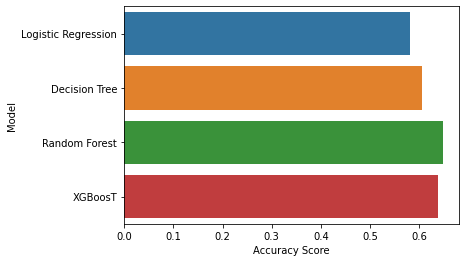

In [ ]:
sns.barplot(x="Accuracy Score", y= "Model", data  = models)
models.sort_values(by = "Accuracy Score", ascending = False)